# Housing Case Study

Problem Statement: A real state company has a dataset containg the prices of properties.It wishes to use the data to optimize the sale prices of properties  based on important factor..


# Importing and understanding data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [2]:
df = pd.read_csv("Housing.csv")
df.head(3)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

# Data Preparation

* In this dataset there are many column with yes no value
* we need to convert this data into numerical value

In [6]:
df["mainroad"] = df["mainroad"].map({"yes":1,"no":0})
df["guestroom"] = df["guestroom"].map({"yes":1,"no":0})
df["basement"] = df["basement"].map({"yes":1,"no":0})
df["hotwaterheating"] = df["hotwaterheating"].map({"yes":1,"no":0})
df["airconditioning"] = df["airconditioning"].map({"yes":1,"no":0})
df["prefarea"] = df["prefarea"].map({"yes":1,"no":0})

In [7]:
df.head(3)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished


In [8]:
# the variable "ffurnishingstatus" value need to convert into numerical value

status  = pd.get_dummies(df["furnishingstatus"])

In [9]:
status.head(4)

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0


In [10]:
# we dont need three columns
status = pd.get_dummies(df["furnishingstatus"],drop_first = True)
status.tail(3)

,semi-furnished,unfurnished
542,0,1
543,0,0
544,0,1


In [11]:
df = pd.concat([df,status],axis = 1)
df.head(3)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0


In [12]:
# we dont need the furnishingstatus column

df.drop(["furnishingstatus"],axis = 1,inplace = True)

In [13]:
df.head(3)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0


# Rescaling the features

* It is extreamly important to rescale the variable so that they have a compareable scale

In [14]:
# normalization

def norm(x):
    return ((x-np.min(x))/( max(x)- min(x)))

#applying normalization to all columns

df = df.apply(norm)

# Spliting the data

In [15]:
X = df.drop("price",axis = 1)
y = df["price"]

In [16]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 32)

# Builiding a linear model

In [17]:
import statsmodels.api as sm

X_train = sm.add_constant(X_train)

lm_1 = sm.OLS(y_train,X_train).fit()

In [33]:
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     55.11
Date:                Thu, 08 Apr 2021   Prob (F-statistic):           6.03e-78
Time:                        01:50:08   Log-Likelihood:                 361.32
No. Observations:                 381   AIC:                            -694.6
Df Residuals:                     367   BIC:                            -639.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0190      0.023     

# Checking VIF

In [34]:
def vif_cal(input_data,dependent_col):
    vif_df = pd.DataFrame(columns= ["Var","Vif"])
    x_vars = input_data.drop([dependent_col],axis = 1)
    xvars_name = x_vars.columns
    
    for i in range(0,xvars_name.shape[0]):
        y = x_vars[xvars_name[i]]
        x = x_vars[xvars_name.drop(xvars_name[i])]
        rsq = sm.OLS(y,x).fit().rsquared
        vif = round(1/(1-rsq),2)
        vif_df.loc[i] = [xvars_name[i],vif]
        
    return vif_df.sort_values(by = "Vif",axis = 0,ascending = False,inplace = False)

In [35]:
# calculating vif 

vif_cal(df,dependent_col = "price")

,Var,Vif
1,bedrooms,7.55
4,mainroad,5.91
0,area,4.64
3,stories,2.75
11,semi-furnished,2.24
6,basement,2.01
9,parking,2.00
12,unfurnished,1.87
8,airconditioning,1.76
2,bathrooms,1.69


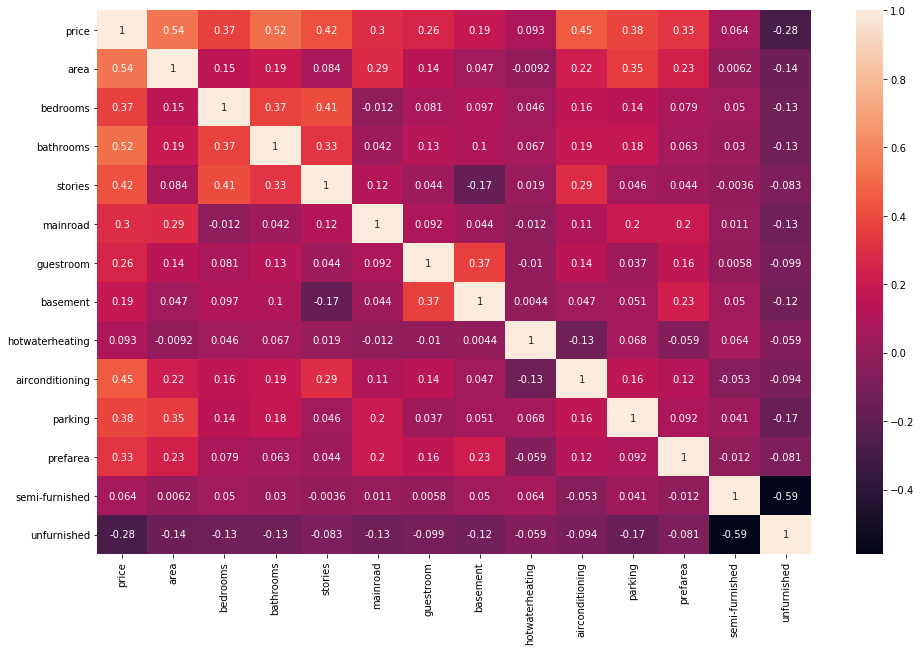

In [36]:
plt.figure(figsize = (16,10))
sns.heatmap(df.corr(),annot = True)

# Droping the variable and update the model

In [38]:
# dropiping highly correlated variable and insignificant variables

X_train = X_train.drop("bedrooms",1)

In [39]:
#create a new model with updated train dataset

lm_2 = sm.OLS(y_train,X_train).fit()

In [40]:
#Check  the summary of the new model

print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     59.68
Date:                Thu, 08 Apr 2021   Prob (F-statistic):           1.11e-78
Time:                        01:57:12   Log-Likelihood:                 360.93
No. Observations:                 381   AIC:                            -695.9
Df Residuals:                     368   BIC:                            -644.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0308      0.018     

In [41]:
#calculating the vif value

vif_cal(input_data = df.drop(["bedrooms"],axis = 1),dependent_col = "price")

,Var,Vif
3,mainroad,5.51
0,area,4.43
2,stories,2.32
10,semi-furnished,2.00
8,parking,1.99
5,basement,1.90
7,airconditioning,1.76
11,unfurnished,1.65
1,bathrooms,1.62
9,prefarea,1.50


In [42]:
X_train = X_train.drop("semi-furnished",1)

In [43]:
lm_3 = sm.OLS(y_train,X_train).fit()

In [44]:
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     65.27
Date:                Thu, 08 Apr 2021   Prob (F-statistic):           1.37e-79
Time:                        02:05:18   Log-Likelihood:                 360.90
No. Observations:                 381   AIC:                            -697.8
Df Residuals:                     369   BIC:                            -650.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0328      0.016     

In [45]:
vif_cal(input_data = df.drop(["bedrooms","semi-furnished"],axis =1),dependent_col= "price")

,Var,Vif
3,mainroad,4.85
0,area,4.36
2,stories,2.30
8,parking,1.99
5,basement,1.86
7,airconditioning,1.75
1,bathrooms,1.62
9,prefarea,1.49
4,guestroom,1.47
10,unfurnished,1.34


# Prediction with model 

In [51]:
#adding constant variable to test data
X_test_n3 = sm.add_constant(X_test)

In [52]:
X_test_n3 = X_test_n3.drop(["bedrooms","semi-furnished"],axis = 1)

In [53]:
y_pred3 = lm_3.predict(X_test_n3)

# Model Evaluation

Text(0, 0.5, 'Housing Price')

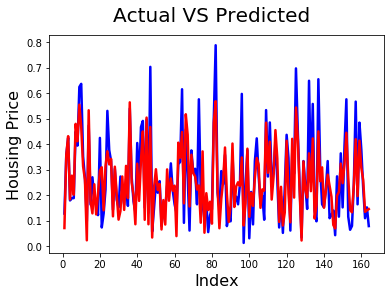

In [54]:
#Actual vs Predicted

c = [i for i in range(1,165,1)]
fig = plt.figure()
plt.plot(c,y_test,color = "blue",linewidth = 2.5,linestyle = "-")
plt.plot(c,y_pred3,color = "red",linewidth = 2.5,linestyle = "-")
fig.suptitle("Actual VS Predicted",fontsize = 20)
plt.xlabel("Index",fontsize = 16)
plt.ylabel("Housing Price",fontsize = 16)

Text(0, 0.5, 'Y_pred')

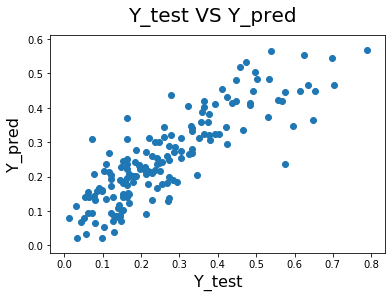

In [55]:
#plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test,y_pred3)
fig.suptitle("Y_test VS Y_pred",fontsize = 20)
plt.xlabel("Y_test",fontsize = 16)
plt.ylabel("Y_pred",fontsize = 16)

Text(0, 0.5, 'y_test-y_pred')

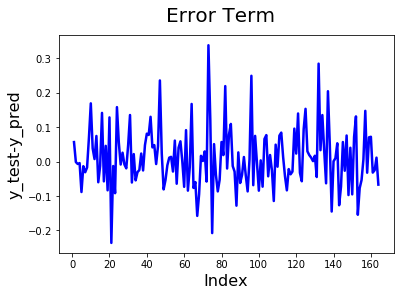

In [58]:
#Error Term
fig = plt.figure()
c = [i for i in range(1,165,1)]
plt.plot(c,y_test-y_pred3,color = "blue",linewidth = 2.5,linestyle ="-")
fig.suptitle("Error Term",fontsize = 20)
plt.xlabel("Index",fontsize = 16)
plt.ylabel("y_test-y_pred",fontsize = 16)

Text(0, 0.5, 'Index')

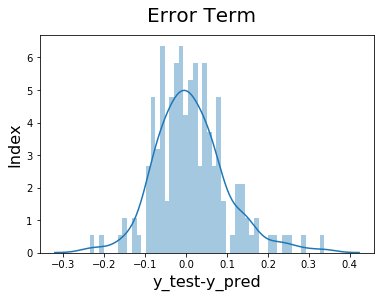

In [60]:
fig = plt.figure()
sns.distplot((y_test-y_pred3),bins = 50)
fig.suptitle("Error Term",fontsize = 20)
plt.xlabel("y_test-y_pred",fontsize = 16)
plt.ylabel("Index",fontsize = 16)

In [61]:
from sklearn import metrics
print("RMSE :",np.sqrt(metrics.mean_squared_error(y_test,y_pred3)))

RMSE : 0.08771789730837011
